In [2]:
print('Hi team')

Hi team


In [3]:
## import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd
import rasterio as rs 
import glob
import cartopy
import matplotlib.cm as cm
import matplotlib.colors as colors
from scipy.stats import gamma


In [4]:
glob.glob('data/boundary/*')

['data/boundary/cb_2024_37_tract_500k', 'data/boundary/durham_census_tracts']

## read in the data

In [6]:
## glob is useful to find files

print(glob.glob('data/boundary/cb_2024_37_tract_500k/*'))

['data/boundary/cb_2024_37_tract_500k/cb_2024_37_tract_500k.prj', 'data/boundary/cb_2024_37_tract_500k/cb_2024_37_tract_500k.shp.ea.iso.xml', 'data/boundary/cb_2024_37_tract_500k/cb_2024_37_tract_500k.shp', 'data/boundary/cb_2024_37_tract_500k/cb_2024_37_tract_500k.cpg', 'data/boundary/cb_2024_37_tract_500k/cb_2024_37_tract_500k.shx', 'data/boundary/cb_2024_37_tract_500k/cb_2024_37_tract_500k.shp.iso.xml', 'data/boundary/cb_2024_37_tract_500k/cb_2024_37_tract_500k.dbf']


In [7]:
## read in census tract boundaries for all of nc

tract_boundaries=gpd.read_file('data/boundary/cb_2024_37_tract_500k/cb_2024_37_tract_500k.shp')
tract_boundaries.head()

,STATEFP,COUNTYFP,TRACTCE,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,37,037,020600,1400000US37037020600,37037020600,206,Census Tract 206,NC,Chatham County,North Carolina,CT,303405838,2361346,"POLYGON ((-79.40216 35.59187, -79.40128 35.593..."
1,37,105,030102,1400000US37105030102,37105030102,301.02,Census Tract 301.02,NC,Lee County,North Carolina,CT,15530239,303225,"POLYGON ((-79.23063 35.45868, -79.22612 35.463..."
2,37,165,010101,1400000US37165010101,37165010101,101.01,Census Tract 101.01,NC,Scotland County,North Carolina,CT,15342332,126567,"POLYGON ((-79.5279 34.74421, -79.52571 34.7459..."
3,37,133,000800,1400000US37133000800,37133000800,8,Census Tract 8,NC,Onslow County,North Carolina,CT,1456231,47495,"POLYGON ((-77.35379 34.73452, -77.35148 34.736..."
4,37,015,960300,1400000US37015960300,37015960300,9603,Census Tract 9603,NC,Bertie County,North Carolina,CT,522413148,7284197,"POLYGON ((-77.32762 36.07624, -77.32637 36.076..."


In [8]:
tract_boundaries.iloc[4:,[2,6]]

,TRACTCE,NAMELSAD
4,960300,Census Tract 9603
5,011500,Census Tract 115
6,020100,Census Tract 201
7,001100,Census Tract 11
8,021300,Census Tract 213
...,...,...
2655,001601,Census Tract 16.01
2656,930600,Census Tract 9306
2657,960500,Census Tract 9605
2658,053519,Census Tract 535.19


In [9]:
print(tract_boundaries.crs)

EPSG:4269


In [10]:
## everytime you reach in a file, set the crs to epsg 4326

print(tract_boundaries.crs)

tract_boundaries=tract_boundaries.to_crs(epsg=4326)

print(tract_boundaries.crs)

EPSG:4269
EPSG:4326


In [11]:
gamma_model=gamma(a=2,scale=4)

x=np.linspace(0,30,1000)
y=gamma_model.pdf(x)

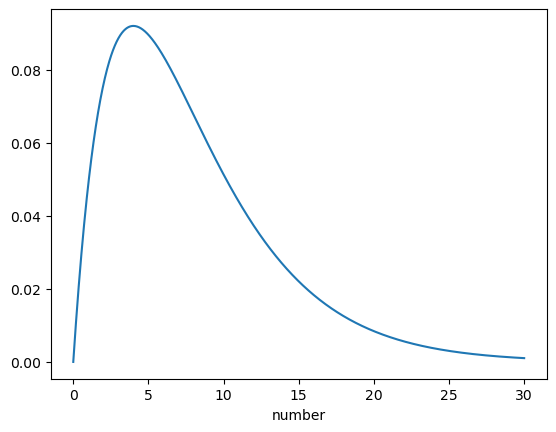

In [12]:
fig,ax=plt.subplots()

ax.plot(x,y)

ax.set_xlabel('number')
plt.show()

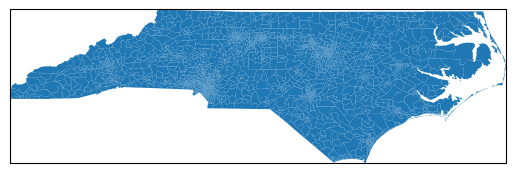

In [13]:
## plot boundaries

ax = plt.axes(projection = cartopy.crs.PlateCarree())

ax.add_geometries(tract_boundaries.geometry, crs = cartopy.crs.PlateCarree())

#Extract the boundaries
bounds = tract_boundaries.total_bounds
#Use the boundaries to define the map extent
ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]])

plt.show()

## now lets find the tracts in durham

We can see that the county is held in NAMELSADCO

In [16]:
## all the unique counties in NC
print(tract_boundaries['NAMELSADCO'].unique())

['Chatham County' 'Lee County' 'Scotland County' 'Onslow County'
 'Bertie County' 'Orange County' 'Alamance County' 'Durham County'
 'Edgecombe County' 'Lenoir County' 'New Hanover County' 'Pitt County'
 'Randolph County' 'Rowan County' 'Vance County' 'Wake County'
 'Catawba County' 'Wilson County' 'Buncombe County' 'Caldwell County'
 'Wayne County' 'Dare County' 'Forsyth County' 'Guilford County'
 'Madison County' 'Henderson County' 'Rockingham County'
 'Mecklenburg County' 'Mitchell County' 'Craven County' 'Union County'
 'Watauga County' 'Graham County' 'Lincoln County' 'Greene County'
 'Iredell County' 'Polk County' 'Gaston County' 'Cabarrus County'
 'Cumberland County' 'Wilkes County' 'Hyde County' 'Davidson County'
 'Stanly County' 'Cherokee County' 'Duplin County' 'Sampson County'
 'Johnston County' 'Moore County' 'Jones County' 'Richmond County'
 'Robeson County' 'Beaufort County' 'Martin County' 'Burke County'
 'Yancey County' 'McDowell County' 'Cleveland County' 'Halifax Coun

In [17]:
## slicing on the boundaries in durham county

durham_boundaries=tract_boundaries.loc[tract_boundaries['NAMELSADCO']=='Durham County',:]

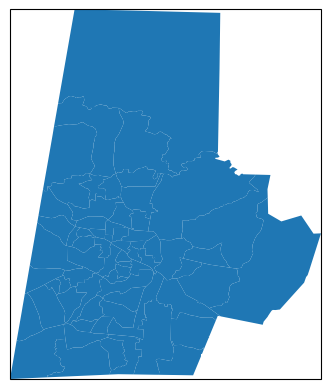

In [18]:
## now lets plot the durham counties

ax = plt.axes(projection = cartopy.crs.PlateCarree())

ax.add_geometries(durham_boundaries.geometry, crs = cartopy.crs.PlateCarree())

#Extract the boundaries
bounds = durham_boundaries.total_bounds
#Use the boundaries to define the map extent
ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]])

plt.show()

In [19]:
## saving file

durham_boundaries.to_file('data/boundary/durham_census_tracts/durham_tract_boundaries.shp')

In [20]:
durham_boundaries.head()

,STATEFP,COUNTYFP,TRACTCE,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
7,37,063,001100,1400000US37063001100,37063001100,11,Census Tract 11,NC,Durham County,North Carolina,CT,1396022,0,"POLYGON ((-78.8971 35.99051, -78.8957 35.99216..."
67,37,063,002200,1400000US37063002200,37063002200,22,Census Tract 22,NC,Durham County,North Carolina,CT,1538433,0,"POLYGON ((-78.91253 36.00297, -78.91249 36.003..."
106,37,063,002033,1400000US37063002033,37063002033,20.33,Census Tract 20.33,NC,Durham County,North Carolina,CT,7375570,76828,"POLYGON ((-79.00688 35.9172, -79.00439 35.9315..."
107,37,063,002300,1400000US37063002300,37063002300,23,Census Tract 23,NC,Durham County,North Carolina,CT,1241975,0,"POLYGON ((-78.90906 35.98449, -78.90791 35.986..."
129,37,063,000200,1400000US37063000200,37063000200,2,Census Tract 2,NC,Durham County,North Carolina,CT,3021170,0,"POLYGON ((-78.9031 36.0055, -78.90178 36.00784..."


In [21]:
income_data=pd.read_csv('data/census/tract/ACS2023_income_data.csv')
income_data.head()
income_data=income_data.loc[1:,:]

income_data.head()

,GEO_ID,NAME,S1901_C01_001E,S1901_C01_001M,S1901_C01_002E,S1901_C01_002M,S1901_C01_003E,S1901_C01_003M,S1901_C01_004E,S1901_C01_004M,...,S1901_C04_012E,S1901_C04_012M,S1901_C04_013E,S1901_C04_013M,S1901_C04_014E,S1901_C04_014M,S1901_C04_015E,S1901_C04_015M,S1901_C04_016E,S1901_C04_016M
1,1400000US37063000101,Census Tract 1.01; Durham County; North Carolina,1503,188,6.9,4.8,0.3,0.6,9.7,5.9,...,59100,22428,62997,14959,(X),(X),(X),(X),50.2,(X)
2,1400000US37063000102,Census Tract 1.02; Durham County; North Carolina,1639,144,2.6,2.3,5.2,5.2,6.7,4.7,...,49455,15966,63447,13301,(X),(X),(X),(X),19.1,(X)
3,1400000US37063000200,Census Tract 2; Durham County; North Carolina,1222,168,2.2,2.6,7.3,7.2,11.1,7.2,...,77941,55772,90331,29584,(X),(X),(X),(X),21.7,(X)
4,1400000US37063000301,Census Tract 3.01; Durham County; North Carolina,1601,352,1.4,1.6,4.3,4.1,12.9,12.9,...,50570,13916,56478,11091,(X),(X),(X),(X),24.4,(X)
5,1400000US37063000302,Census Tract 3.02; Durham County; North Carolina,1690,200,3.6,3.2,5.2,7.2,3,2.4,...,64757,12911,88083,24929,(X),(X),(X),(X),29.5,(X)


In [22]:
income_data['GEO_ID'].apply(lambda x: x[-6:])

1     000101
2     000102
3     000200
4     000301
5     000302
       ...  
64    002038
65    002100
66    002200
67    002300
68    980100
Name: GEO_ID, Length: 68, dtype: object

In [23]:
income_data['TRACTCE']=income_data['GEO_ID'].apply(lambda x: x[-6:])
mean_income=income_data.loc[:,['TRACTCE','S1901_C04_013M']]

mean_income.head()

,TRACTCE,S1901_C04_013M
1,000101,14959
2,000102,13301
3,000200,29584
4,000301,11091
5,000302,24929


In [24]:
durham_boundaries=durham_boundaries.merge(mean_income,on='TRACTCE')

durham_boundaries=durham_boundaries.rename(columns={'S1901_C04_013M':'mean income ($)'})
durham_boundaries['mean income ($)']=pd.to_numeric(durham_boundaries['mean income ($)'],errors='coerce')

In [25]:
durham_boundaries

,STATEFP,COUNTYFP,TRACTCE,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry,mean income ($)
0,37,063,001100,1400000US37063001100,37063001100,11,Census Tract 11,NC,Durham County,North Carolina,CT,1396022,0,"POLYGON ((-78.8971 35.99051, -78.8957 35.99216...",9220.0
1,37,063,002200,1400000US37063002200,37063002200,22,Census Tract 22,NC,Durham County,North Carolina,CT,1538433,0,"POLYGON ((-78.91253 36.00297, -78.91249 36.003...",28246.0
2,37,063,002033,1400000US37063002033,37063002033,20.33,Census Tract 20.33,NC,Durham County,North Carolina,CT,7375570,76828,"POLYGON ((-79.00688 35.9172, -79.00439 35.9315...",21500.0
3,37,063,002300,1400000US37063002300,37063002300,23,Census Tract 23,NC,Durham County,North Carolina,CT,1241975,0,"POLYGON ((-78.90906 35.98449, -78.90791 35.986...",20234.0
4,37,063,000200,1400000US37063000200,37063000200,2,Census Tract 2,NC,Durham County,North Carolina,CT,3021170,0,"POLYGON ((-78.9031 36.0055, -78.90178 36.00784...",29584.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,37,063,002031,1400000US37063002031,37063002031,20.31,Census Tract 20.31,NC,Durham County,North Carolina,CT,1551499,0,"POLYGON ((-78.96951 35.96553, -78.96352 35.968...",24878.0
64,37,063,002034,1400000US37063002034,37063002034,20.34,Census Tract 20.34,NC,Durham County,North Carolina,CT,10294029,60787,"POLYGON ((-78.99882 35.95093, -78.98677 35.956...",12160.0
65,37,063,001712,1400000US37063001712,37063001712,17.12,Census Tract 17.12,NC,Durham County,North Carolina,CT,9340512,156841,"POLYGON ((-78.97803 36.05933, -78.97468 36.059...",25545.0
66,37,063,000102,1400000US37063000102,37063000102,1.02,Census Tract 1.02,NC,Durham County,North Carolina,CT,3998235,726,"POLYGON ((-78.9166 36.02527, -78.9125 36.02904...",13301.0


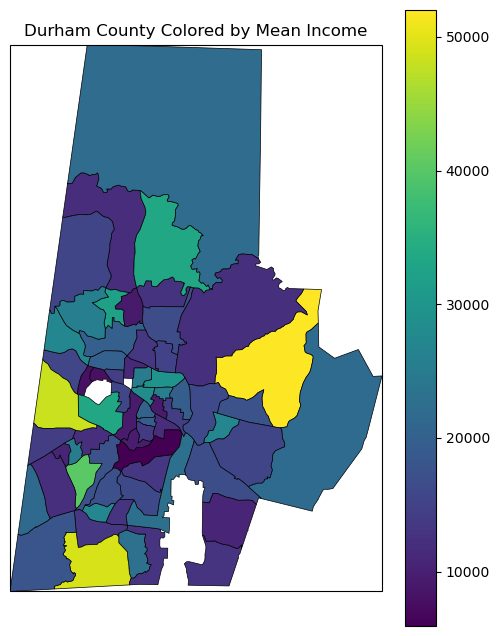

In [26]:
## now lets plot the durham counties

column='mean income ($)'

vmin = durham_boundaries[column].min()
vmax = durham_boundaries[column].max()
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.viridis

fig, ax = plt.subplots(figsize=(6,8), subplot_kw={'projection': cartopy.crs.PlateCarree()})
# Plot directly using GeoPandas, specifying the Cartopy axis
durham_boundaries.plot(
    column=column,              # Replace with your column
    cmap='viridis',                   # Or another colormap, e.g., 'plasma', 'coolwarm'
    legend=True,                      # Adds a colorbar
    ax=ax,
    edgecolor='black',                # Optional: outline polygons
    linewidth=0.5                     # Optional: border width
)

# Set extent based on data bounds
bounds = durham_boundaries.total_bounds
ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]])

plt.title("Durham County Colored by Mean Income")  # Update title as needed
plt.show()